<a href="https://colab.research.google.com/github/habibsifat/Image-Processing/blob/master/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
ls'drive/My Drive/Colab Notebooks/Job_Test/'

 Image_classificationPerson.ipynb
 img/
 MobileNetSSD_deploy.caffemodel
 MobileNetSSD_deploy.prototxt.txt
 Object_Detection.ipynb
 TEST.mp4
'Test Question (Machine Learning Engineer) (1).pdf'
 VideoToImage.ipynb


In [0]:
import numpy as np
import cv2
import glob 
from matplotlib import pyplot as plt
from imutils.video import FPS
import time
from PIL import  Image

In [0]:
net = cv2.dnn.readNetFromCaffe('drive/My Drive/Colab Notebooks/Job_Test/MobileNetSSD_deploy.prototxt.txt' , 'drive/My Drive/Colab Notebooks/Job_Test/MobileNetSSD_deploy.caffemodel')

In [0]:
CLASSES = ["backgroun", "aeroplane", "bicycle", "bird", "boat", "bottale", "bus", "car", "cat", "chair", "cow", "diningtable",
            "dog", "horse", "motorbike","person","pottedplant", "sheep", "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255,size=(len(CLASSES), 3))

In [0]:
def object_detection(image):
  (h,w) =image.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
  net.setInput(blob)
  detections = net.forward()
  for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > .60:
      idx = int(detections[0, 0, i, 1])
      box = detections[0,0,i,3:7] * np.array([w,h,w,h])
      (startX, startY,endX, endY) = box.astype("int")
      label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 10)

      cv2.rectangle(image, (startX, startY), (endX, endY), COLORS[idx], 2)
      y =startY - 15 if startY - 15 > 15 else startY + 15
      cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

  return image

In [43]:
image=cv2.imread('drive/My Drive/Colab Notebooks/Job_Test/img/image4.jpg')
image=object_detection(image)
cv2.imwrite('drive/My Drive/Colab Notebooks/Job_Test/Detect/result4.jpg', image)
#Image.open('drive/My Drive/Colab Notebooks/Job_Test/Detect/result2.jpg', width=400,height=200)#

True

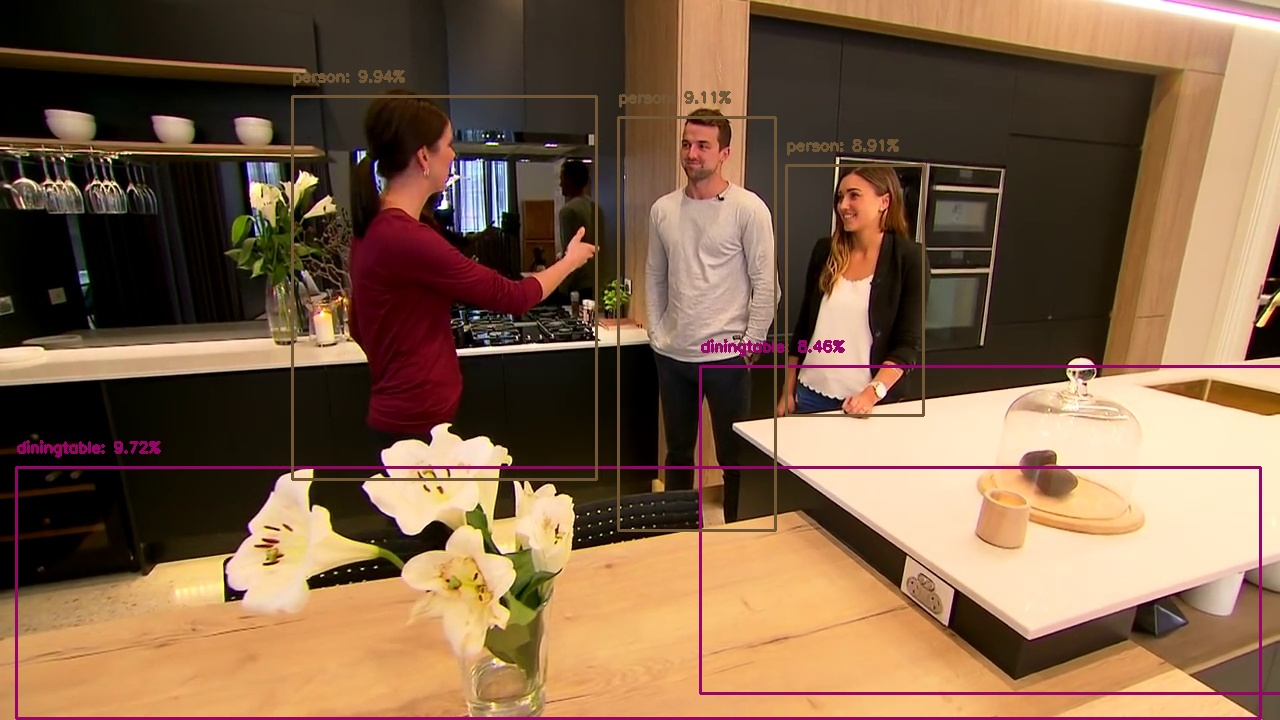

In [45]:
from IPython.display import Image
Image(filename='drive/My Drive/Colab Notebooks/Job_Test/Detect/result4.jpg' , width=800,height=800)